## <center> Import Libs

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (13, 8)
plt.rcParams["font.size"] = 18

import seaborn as sns
# Customizing seaborn color palette
sns.light_palette("seagreen", as_cmap=True)
sns.set(style="darkgrid")

import plotly.express as px
import plotly.figure_factory as ff

import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = "notebook_connected"

from statsmodels.graphics.tsaplots import plot_pacf

from autots import AutoTS

import warnings 
warnings.filterwarnings('ignore')

## <center> Import Data

In [2]:
# import pandas as pd
# import yfinance as yf
# import datetime
# from datetime import date, timedelta
# today = date.today()

# d1 = today.strftime("%Y-%m-%d")
# end_date = d1
# d2 = date.today() - timedelta(days=730)
# d2 = d2.strftime("%Y-%m-%d")
# start_date = d2

# data = yf.download('BTC-USD', 
#                       start=start_date, 
#                       end=end_date, 
#                       progress=False)
# data["Date"] = data.index
# data = data[["Date", "Open", "High", "Low", "Close", "Volume"]]
# data.reset_index(drop=True, inplace=True)

# data.to_csv('data/BTC.csv', index = False)

In [3]:
data = pd.read_csv('data/BTC.csv')
data.head()

,Date,Open,High,Low,Close,Volume
0,2020-08-11,11881.647461,11932.710938,11195.708984,11410.525391,27039782640
1,2020-08-12,11404.596680,11748.396484,11249.605469,11584.934570,25064548486
2,2020-08-13,11588.405273,11796.396484,11216.872070,11784.137695,27522199497
3,2020-08-14,11772.659180,12150.994141,11685.455078,11768.871094,24237958589
4,2020-08-15,11768.697266,11963.203125,11768.697266,11865.698242,23354924400


## <center> Data Info

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    731 non-null    object 
 1   Open    731 non-null    float64
 2   High    731 non-null    float64
 3   Low     731 non-null    float64
 4   Close   731 non-null    float64
 5   Volume  731 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 34.4+ KB


In [5]:
data.describe()

,Open,High,Low,Close,Volume
count,731.000000,731.000000,731.000000,731.000000,7.310000e+02
mean,36962.667802,37926.696539,35868.206188,36973.032359,3.916197e+10
std,15186.302527,15549.209441,14749.395354,15159.409123,2.070063e+10
min,10134.151367,10350.542969,9916.493164,10131.516602,1.373656e+10
25%,23265.813477,23961.552734,22790.122070,23301.756836,2.662429e+10
50%,38742.816406,39789.281250,37518.214844,38705.980469,3.405904e+10
75%,47790.845703,49175.048828,46748.152344,47747.423828,4.661880e+10
max,67549.734375,68789.625000,66382.062500,67566.828125,3.509679e+11


## <center> Null Values / Duplicates

In [6]:
data.isnull().sum()

Date      0
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

In [7]:
print(f"Duplicated data: {data.duplicated().sum()}")

Duplicated data: 0


## <center> Plot Data

In [8]:
data['MA20'] = data['Close'].rolling(window=20).mean()
data['MA5'] = data['Close'].rolling(window=5).mean()

fig = go.Figure(
    data=[go.Candlestick(
        x=data['Date'],
        open=data['Open'],
        high=data['High'],
        low=data['Low'],
        close=data['Close']
    )]
)

fig.update_layout(xaxis_rangeslider_visible=False)

fig.update_layout(
    height = 600, 
    width = 1000, 
    title = 'BTC-USDT'
)

fig.add_trace(
    go.Scatter(
        x=data['Date'], 
        y=data['MA5'], 
        opacity=0.7, 
        line=dict(color='blue', width=2), 
        name='MA 5'
    )
)

fig.add_trace(
    go.Scatter(
        x=data['Date'], 
        y=data['MA20'], 
        opacity=0.7, 
        line=dict(color='orange', width=2), 
        name='MA 20'
    )
)

fig.show()

## <center> Correlation Check

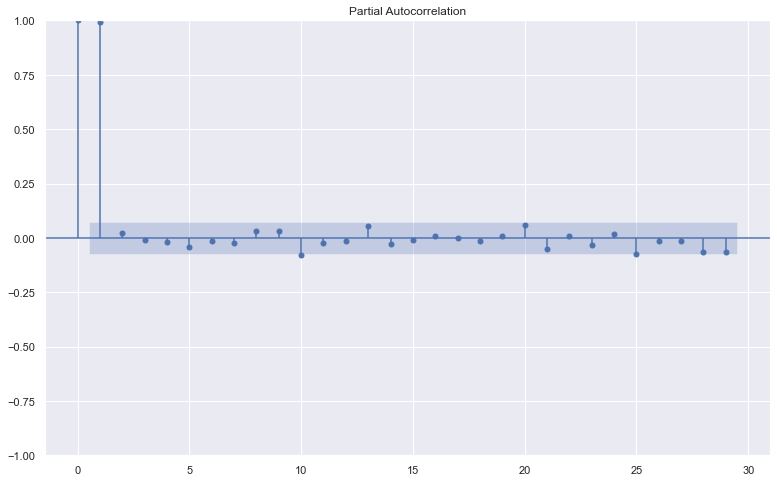

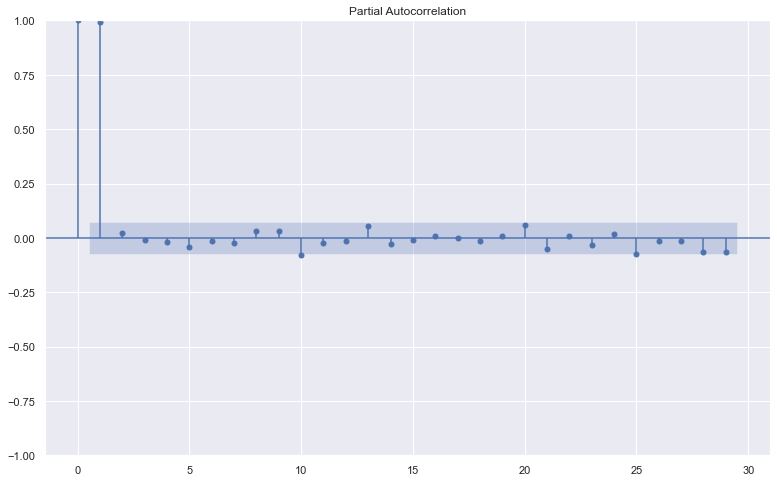

In [9]:
plot_pacf(data['Close'])

## <center> Dividing into train / test

In [10]:
test_size = 31

train_data = data[['Date','Close']].iloc[:-test_size]
test_data = data[['Date', 'Close']].iloc[-test_size:]

([], [])

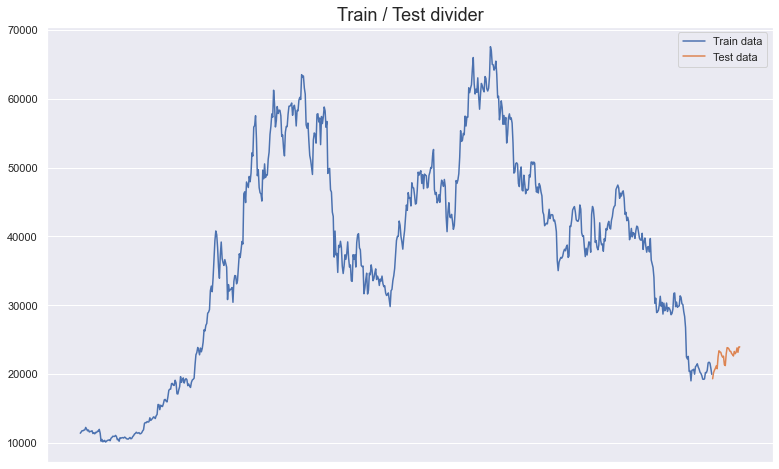

In [11]:
plt.plot(train_data['Date'], train_data['Close'], label = 'Train data')
plt.plot(test_data['Date'], test_data['Close'], label = 'Test data')
plt.legend()
plt.title('Train / Test divider', fontsize = 18)
plt.xticks([])

## <center> Modeling

In [12]:
model = AutoTS(
    forecast_length = test_size, 
    frequency = 'infer', 
    ensemble = None,
    model_list="fast"
)

model = model.fit(
    train_data,
    date_col = 'Date', 
    value_col = 'Close', 
    id_col = None
)

prediction = model.predict()

forecast = prediction.forecast

Inferred frequency is: D
Model Number: 1 with model AverageValueNaive in generation 0 of 10
Model Number: 2 with model AverageValueNaive in generation 0 of 10
Model Number: 3 with model AverageValueNaive in generation 0 of 10
Model Number: 4 with model DatepartRegression in generation 0 of 10
Model Number: 5 with model DatepartRegression in generation 0 of 10
Model Number: 6 with model DatepartRegression in generation 0 of 10
Model Number: 7 with model DatepartRegression in generation 0 of 10
Template Eval Error: ImportError('Tensorflow not available, install with pip install tensorflow.') in model 7: DatepartRegression
Model Number: 8 with model ETS in generation 0 of 10
Model Number: 9 with model ETS in generation 0 of 10
Model Number: 10 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 10: GLM
Mode

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 44 with model GLS in generation 0 of 10
Model Number: 45 with model SeasonalNaive in generation 0 of 10
Model Number: 46 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 46: GLM
Model Number: 47 with model ETS in generation 0 of 10
Model Number: 48 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 48: VAR
Model Number: 49 with model VECM in generation 0 of 10
Template Eval Error: ValueError("regression_type='User' but no future_regressor supplied") in model 49: VECM
Model Number: 50 with model WindowRegression in generation 0 of 10
Template Eval Error: ValueError('Model WindowRegression returned NaN for one or more series. fail_on_forecast_nan=True') in model 50: WindowRegression
Model Number: 51 with model DatepartRegression in generation 0 of 10
Model Number: 52 with model UnivariateMotif in generation 0 of 10
Model Number: 53 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 186 tasks      | elapsed:    0.2s


Model Number: 62 with model VECM in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VECM') in model 62: VECM
Model Number: 63 with model MultivariateMotif in generation 0 of 10
Model Number: 64 with model SectionalMotif in generation 0 of 10
Model Number: 65 with model GLM in generation 0 of 10
Template Eval Error: ValueError('regression_type=user and no future_regressor passed') in model 65: GLM
Model Number: 66 with model SeasonalNaive in generation 0 of 10
Model Number: 67 with model NVAR in generation 0 of 10


[Parallel(n_jobs=-2)]: Done 300 out of 300 | elapsed:    0.3s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 186 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 300 out of 300 | elapsed:    0.0s finished


Model Number: 68 with model MultivariateMotif in generation 0 of 10
Model Number: 69 with model SectionalMotif in generation 0 of 10
Template Eval Error: Exception('Transformer Detrend failed on fit') in model 69: SectionalMotif
Model Number: 70 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 70: VAR
Model Number: 71 with model VAR in generation 0 of 10
Template Eval Error: ValueError('Only gave one variable to VAR') in model 71: VAR
Model Number: 72 with model UnivariateMotif in generation 0 of 10
Model Number: 73 with model GLM in generation 0 of 10
Template Eval Error: TypeError("ufunc 'isfinite' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''") in model 73: GLM
Model Number: 74 with model ETS in generation 0 of 10
Model Number: 75 with model GLS in generation 0 of 10
Model Number: 76 with model VAR in generation 0 of 10
Template 

[Parallel(n_jobs=-2)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=-2)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=-2)]: Done 100 out of 100 | elapsed:    0.1s finished
[Parallel(n_jobs=7)]: Using backend ThreadingBackend with 7 concurrent workers.
[Parallel(n_jobs=7)]: Done  36 tasks      | elapsed:    0.0s
[Parallel(n_jobs=7)]: Done 100 out of 100 | elapsed:    0.0s finished


Model Number: 546 with model GLS in generation 7 of 10
Template Eval Error: Exception('Transformer StandardScaler failed on fit') in model 546: GLS
Model Number: 547 with model MultivariateMotif in generation 7 of 10
Model Number: 548 with model NVAR in generation 7 of 10
Model Number: 549 with model ETS in generation 7 of 10
Model Number: 550 with model MultivariateMotif in generation 7 of 10
Model Number: 551 with model SeasonalNaive in generation 7 of 10
Model Number: 552 with model LastValueNaive in generation 7 of 10
Model Number: 553 with model DatepartRegression in generation 7 of 10
Model Number: 554 with model NVAR in generation 7 of 10
Template Eval Error: Exception('Transformer Cointegration failed on fit') in model 554: NVAR
Model Number: 555 with model MultivariateMotif in generation 7 of 10
Model Number: 556 with model MultivariateMotif in generation 7 of 10
Model Number: 557 with model UnivariateMotif in generation 7 of 10
Model Number: 558 with model ETS in generation 7

In [14]:
forecast

,Close
2022-07-12,16608.870536
2022-07-13,16302.168243
2022-07-14,16137.944801
2022-07-15,15807.469356
2022-07-16,15677.386684
2022-07-17,15619.690536
2022-07-18,15426.311561
2022-07-19,15310.553514
2022-07-20,15179.601118
2022-07-21,14871.455100
